# Importar las librerías necesarias

Benjamin Aguilar Osorio

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ¿Dónde está el cobalto?

Las baterías eléctricas están generando una demanda particular de cobalto, ya que las baterías de iones de litio utilizan una reacción química entre el litio y el óxido de cobalto. Existen importantes problemas con el suministro actual de cobalto, particularmente con minas de pequeña escala que no están reguladas en cuanto a seguridad, trabajo infantil e impacto ambiental. Mira este vídeo para aprender más:
https://www.youtube.com/watch?v=ll7aUgeK3-o

**Tu objetivo en esta tarea es identificar qué tipos de rocas ígneas tienen más cobalto (Co) al completar las siguientes actividades**

1) La ley más baja de mineral que es minada para cobalto es de 0.01%. ¿Cuántos puntos en los datos tienen concentraciones de cobalto que podrían ser lo suficientemente altas (recuerde que los datos están en ppm)?


2) Compare las distribuciones de cobalto en las categorías de COMPOSITION de 'FELSIC', 'INTERMEDIATE', 'MAFIC', 'ULTRAMAFIC' utilizando tanto estimaciones de densidad de probabilidad como diagramas de caja. Para el diagrama de caja, recomiendo usar `sns.boxenplot` y configurar el ``ylim``. Si tuvieras que elegir una de estas composiciones para la exploración minera, ¿a cuál elegirías y por qué?

3) Digamos que necesitas tomar una decisión si explorar en rocas máficas intrusivas (plutónicas) o rocas volcánicas máficas. Las rocas plutónicas (que poseen granos más grueso debido a que cristalizaron bajo tierra) tienen la etiqueta 'PLUTONIC' en la columna 'TYPE', mientras que las rocas volcánicas tienen la etiqueta 'VOLCANIC'. Utilice un test de hipótesis y determine si tanto la media como la mediana son estadísticamente distintas de las que resultarían de las permutaciones aleatorias. Describe los resultados de tu prueba en un párrafo que demuestre que entiendes qué es la prueba y qué significan los resultados (incluidos los valores p calculados). Será útil leer este capítulo sobre el pensamiento inferencial:
https://www.inferentialthinking.com/chapters/12/Comparing_Two_Samples.html

In [2]:
#importar datos
igneous_data = pd.read_csv('./data/ign.csv',sep='\t')
#descartar datos que no tengan Co (ppm) 
igneous_data_Co = igneous_data.dropna(subset=['CO'])

C:\Users\Benja.DESKTOP-CPSB9KU\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [31]:
percent=igneous_data_Co['CO']/10000
np.count_nonzero(percent>=0.01)

981

981 Datos tiene concentraciones aceptables por la ley más baja del mineral

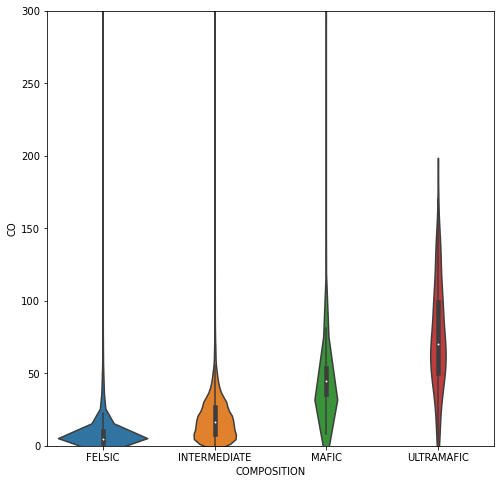

In [41]:
plt.figure(figsize=(8,8))
sns.violinplot(x="COMPOSITION", y="CO", data=igneous_data, order=['FELSIC','INTERMEDIATE','MAFIC','ULTRAMAFIC'])
plt.ylim(0,300)
plt.show()

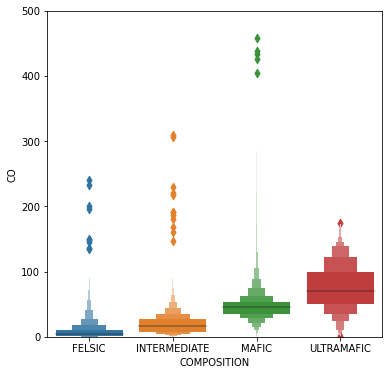

In [37]:
plt.figure(figsize=(6,6))
sns.boxenplot(x="COMPOSITION", y="CO", data=igneous_data, order=['FELSIC','INTERMEDIATE','MAFIC','ULTRAMAFIC'])
plt.ylim(0,500)
plt.show()

Si tuviera que tomar una decisión viendo los gráficos, elegiría la composición ultramafica para realizar la exploración minera, ya que esta es la que posee una mayor media y una distribución de los datos más uniforme, lo que conllevaría a una mayor cantidad de mineral extraído

In [69]:
igneous_volcanic_plutonic=igneous_data[(igneous_data['TYPE']=='VOLCANIC') | (igneous_data['TYPE']=='PLUTONIC')]
igneous_volcanic_plutonic=pd.DataFrame(igneous_volcanic_plutonic,columns=['TYPE','CO'])
igneous_volcanic_plutonic=igneous_volcanic_plutonic.dropna()
igneous_volcanic_plutonic.tail()

,TYPE,CO
66078,VOLCANIC,16.0
66079,VOLCANIC,23.0
66080,VOLCANIC,25.0
66081,VOLCANIC,13.0
66082,VOLCANIC,30.0


Para realizar nuestro test de Hipótesis nulas nos ayudaremos de las funciones de la Actividad 8, las cuales nos permitirán encontrar los promedios y las madias

In [52]:
def difference_of_means(dataframe,value,category_column,category_values):
    mean_1 = np.mean(dataframe[dataframe[category_column]==category_values[0]][value])
    mean_2 = np.mean(dataframe[dataframe[category_column]==category_values[1]][value])
    return mean_1 - mean_2

def difference_of_medians(dataframe,value,category_column,category_values):
    median_1 = np.median(dataframe[dataframe[category_column]==category_values[0]][value])
    median_2 = np.median(dataframe[dataframe[category_column]==category_values[1]][value])
    return median_1 - median_2

In [68]:
igneous_volcanic_plutonic_meandiff=difference_of_means(igneous_volcanic_plutonic,'CO','TYPE',['VOLCANIC','PLUTONIC'])
igneous_volcanic_plutonic_mediandiff=difference_of_medians(igneous_volcanic_plutonic,'CO','TYPE',['VOLCANIC','PLUTONIC'])
print(igneous_volcanic_plutonic_meandiff,igneous_volcanic_plutonic_mediandiff)

16.760107840291848 24.8


In [71]:
igneous_volcanic_plutonic['TYPE_RANDOM']=np.random.permutation(igneous_volcanic_plutonic['TYPE'].values)

In [72]:
difference_of_means(igneous_volcanic_plutonic,'CO','TYPE_RANDOM',['VOLCANIC','PLUTONIC'])

0.1691022847960788

In [73]:
dif_permutations_volcanic_plutonic_mean=[]
dif_permutations_volcanic_plutonic_median=[]

rep=1000
for i in np.arange(rep):
    igneous_volcanic_plutonic['TYPE_RANDOM'] = np.random.permutation(igneous_volcanic_plutonic['TYPE'].values)
    
    new_mean_diff = difference_of_means(igneous_volcanic_plutonic,'CO','TYPE_RANDOM',['VOLCANIC','PLUTONIC'])
    dif_permutations_volcanic_plutonic_mean.append(new_mean_diff)
    
    new_median_diff = difference_of_medians(igneous_volcanic_plutonic,'CO','TYPE_RANDOM',['VOLCANIC','PLUTONIC'])
    dif_permutations_volcanic_plutonic_median.append(new_median_diff)

In [64]:
mean_empirical_p = np.count_nonzero(np.array(dif_permutations_volcanic_plutonic_mean) <= igneous_volcanic_plutonic_meandiff) / rep
mean_empirical_p

1.0

In [67]:
median_empirical_p = np.count_nonzero(dif_permutations_volcanic_plutonic_median <= igneous_volcanic_plutonic_mediandiff) / rep
median_empirical_p

1.0

Entendamos el resultado obtenido.
Como la hipótesis nula tendremos que para las rocas ígneas del tipo plutónica y volcánica existe una relación entre estos tipos de roca y la composición de cobalto en ella. Para verificar la veracidad de esta hipótesis llevamos a cabo un test de hipótesis en el cual se supondrá como falsa esta hipótesis, luego se generan nuevos datos a analizar, para esto tomaremos los datos entregados y cambiaremos el tipo de roca correspondiente a la concentración de cobalto de forma aleatoria, luego calcularemos los promedios y medianas de estos para compararlos con los valores originales, finalmente obtuvimos que los valores simulados siempre son menores a los originales, es decir tendremos un p=1, lo que implica que para el 100% de los casos simulados se cumple la hipótesis de que el tipo de roca influye en la composición de cobalto, validándose así nuestra hipótesis nula

Más información sobre el cobalto para los curiosos:
https://pubs.usgs.gov/of/2017/1155/ofr20171155.pdf